In [148]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt
import math

# Detect edge

read img -> img_gray -> gaussian blur -> use canny to detect edge

Text(0.5, 1.0, 'origin')

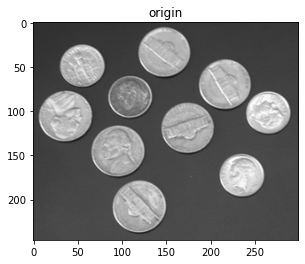

In [33]:
img = cv.imread("coins.png")
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_blur = cv.GaussianBlur(img_gray, (3,3), 0)
plt.imshow(img)
plt.title("origin")


Text(0.5, 1.0, 'blur')

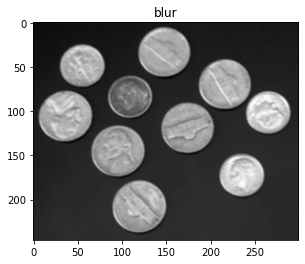

In [35]:
plt.imshow(img_blur, cmap = "gray")
plt.title("blur")

Text(0.5, 1.0, 'Canny method')

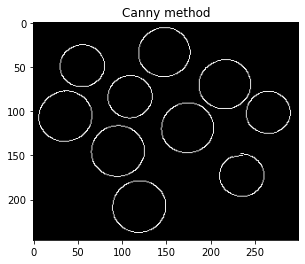

In [39]:
#use canny to detect edge 
edge = cv.Canny(img_blur, 200, 500, 5)
plt.imshow(edge, cmap = "gray")
plt.title("Canny method")

# Hough line transform

read img -> gray -> blur -> canny -> hough line

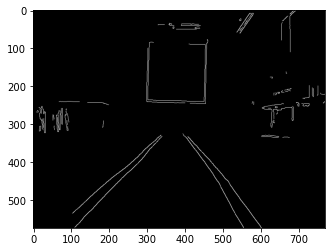

In [112]:
src = cv.imread("lane2.png")
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(gray, (5,5), 0.5)
edges = cv.Canny(blur, 250, 350, 7)
cdst = src.copy()
cdstP = src.copy()
plt.imshow(edges, cmap = "gray")

In [128]:
lines = cv.HoughLines(edges, 1, np.pi / 180, 127, None, 0, 0)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
        print(f"rho value is {rho}")
        print(f"theta value is {theta}")        
    


rho value is 475.0
theta value is 0.767944872379303
rho value is 479.0
theta value is 0.7853981852531433
rho value is 469.0
theta value is 0.8552113175392151
rho value is 481.0
theta value is 0.8028514385223389


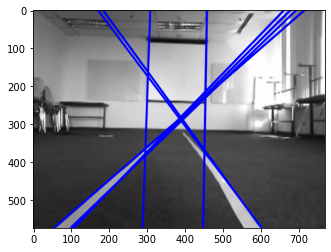

In [125]:
plt.imshow(cdst)

# Hough circle transform

Text(0.5, 1.0, 'origin')

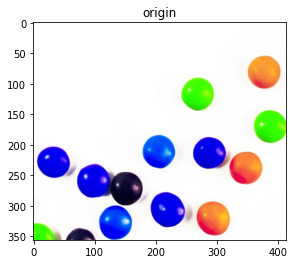

In [205]:
img = cv.imread("smarties.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.medianBlur(gray, 5)

plt.imshow(img)
plt.title("origin")

Text(0.5, 1.0, 'Median blur')

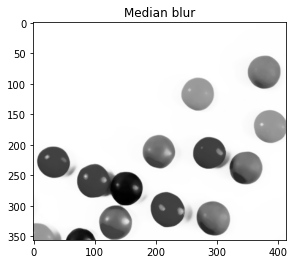

In [185]:
plt.imshow(blur, cmap = "gray")
plt.title("Median blur")

In [206]:
# use hough circle

circles = cv.HoughCircles(blur, cv.HOUGH_GRADIENT, 1, 50, param1=50, param2=30, minRadius=0, maxRadius = 0)
circles


array([[[376.5,  81.5,  26.6],
        [347.5, 238.5,  26.6],
        [293.5, 320.5,  27.9],
        [152.5, 271.5,  27.1],
        [205.5, 210.5,  26.8],
        [386.5, 169.5,  26.4],
        [286.5, 213.5,  25.2],
        [ 32.5, 230.5,  27.5],
        [269.5, 116.5,  25.7],
        [ 99.5, 259.5,  28.1],
        [220.5, 306.5,  27.4],
        [134.5, 328.5,  26.8]]], dtype=float32)

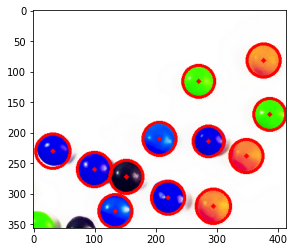

In [209]:
# draw the circle

## around the value 
detected_circles = np.uint16(np.around(circles))
##draw the circle

for (x, y, r) in detected_circles[0]:
    cv.circle(img, (x,y), r, (255,0,0), 3)
    cv.circle(img, (x,y), 2, (255,0,0), -1)

plt.imshow(img, cmap = "gray")